## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
data_info.loc['revol_util','Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name,'Description'])

In [6]:
feat_info('loan_status')

Current status of the loan


In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

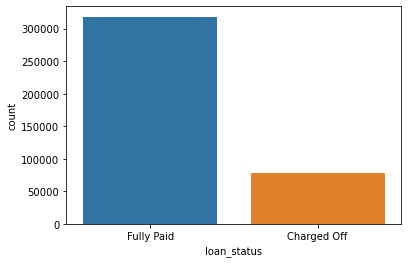

In [9]:
sns.countplot(x='loan_status', data=df);

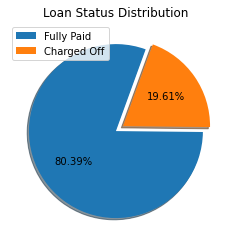

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [10]:
# Alternative
plt.pie(df['loan_status'].value_counts(),explode=[0,0.1],autopct='%1.2f%%',shadow=True,startangle=70)
plt.legend(labels=df.loan_status.unique())
plt.title('Loan Status Distribution')
plt.axis('off')
plt.show()

df.loan_status.value_counts(dropna=False)

> Unbalanced data

**TASK: Create a histogram of the loan_amnt column.**

(0.0, 40000.0)

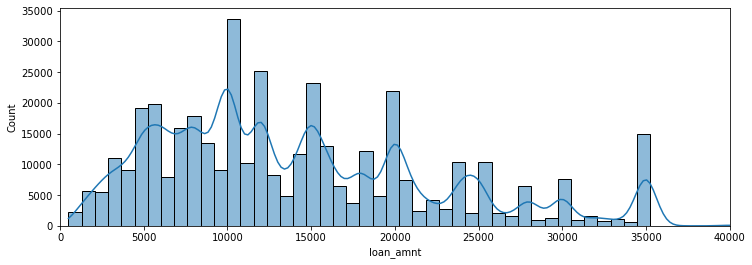

In [11]:
plt.figure(figsize=(12,4))
sns.histplot(x=df['loan_amnt'], kde=True,bins=50)
plt.xlim(0,40000)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

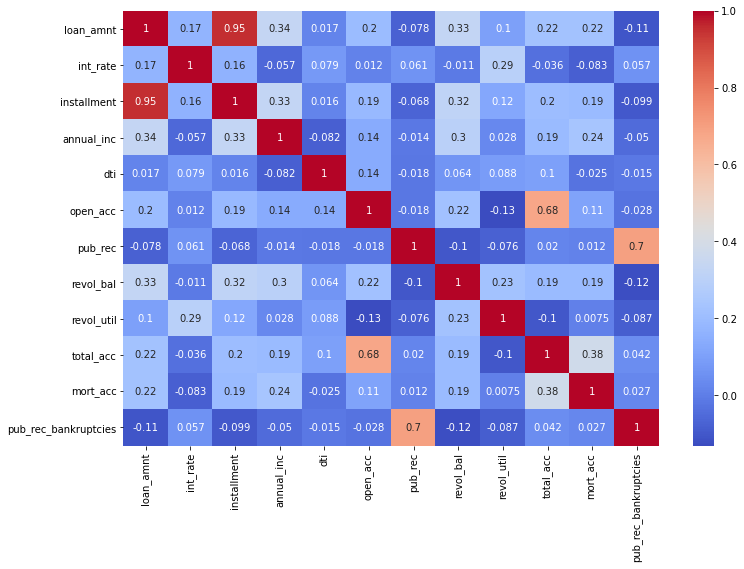

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

In [14]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


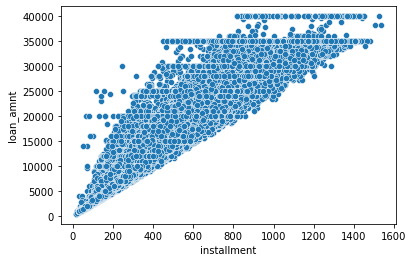

In [17]:
sns.scatterplot(y='loan_amnt',x='installment', data=df);

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [18]:
# her columns in num of uniques

df.apply(lambda x: x.nunique())

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

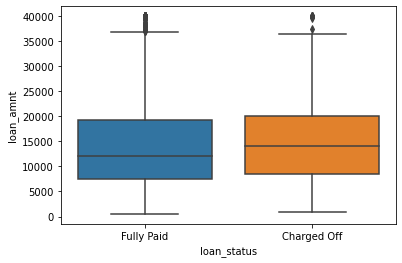

In [19]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df);

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [20]:
df.groupby('loan_status').loan_amnt.describe().T

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [21]:
sorted(df.grade.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [22]:
sorted(df.sub_grade.unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

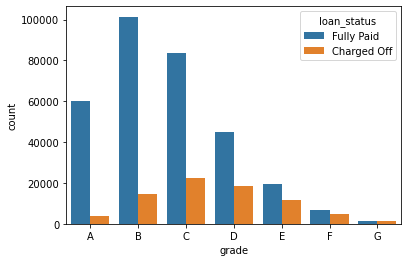

In [23]:
sns.countplot(x='grade', data=df, hue='loan_status', order = sorted(df.grade.unique()));

In [24]:
pd.crosstab(index=df.loan_status,columns=df.grade)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,4036,14587,22449,18338,11765,5037,1461
Fully Paid,60151,101431,83538,45186,19723,6735,1593


In [25]:
# Alternetif

# loan_stat_grade = ['loan_status','grade']
# cm = sns.light_palette("orange", as_cmap=True)
# pd.crosstab(df[loan_stat_grade[0]], df[loan_stat_grade[1]]).style.background_gradient(cmap = cm)

In [26]:
df.groupby(['grade','loan_status'])['term'].count()/df.groupby(['grade'])['term'].count()

grade  loan_status
A      Charged Off    0.062879
       Fully Paid     0.937121
B      Charged Off    0.125730
       Fully Paid     0.874270
C      Charged Off    0.211809
       Fully Paid     0.788191
D      Charged Off    0.288678
       Fully Paid     0.711322
E      Charged Off    0.373634
       Fully Paid     0.626366
F      Charged Off    0.427880
       Fully Paid     0.572120
G      Charged Off    0.478389
       Fully Paid     0.521611
Name: term, dtype: float64

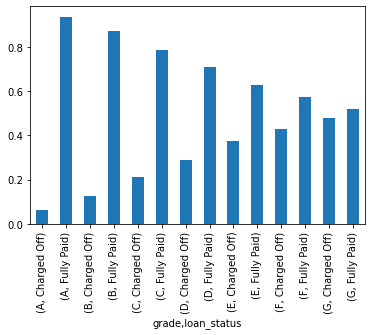

In [27]:
(df.groupby(['grade','loan_status'])['term'].count()/df.groupby(['grade'])['term'].count()).plot.bar();

> A dan G ye gittikce 'Charged Off' orani artmis

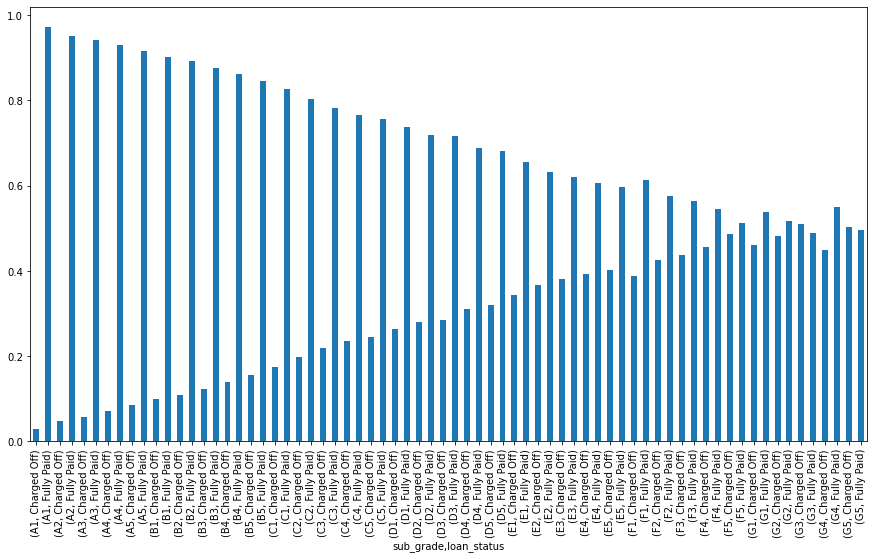

In [28]:
plt.figure(figsize=(15,8))
(df.groupby(['sub_grade','loan_status'])['term'].count()/df.groupby(['sub_grade'])['term'].count()).plot.bar();

. A1 den G5 ye gittikce 'Charged Off' orani genel olarak artmis olmakla beraber G de istisnalari var.

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [29]:
order=sorted(df.sub_grade.unique())

# Alternative
# order=df.sub_grade.value_counts().sort_index().index

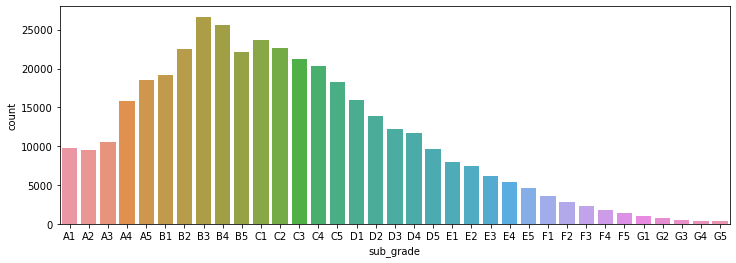

In [30]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df, order=order);

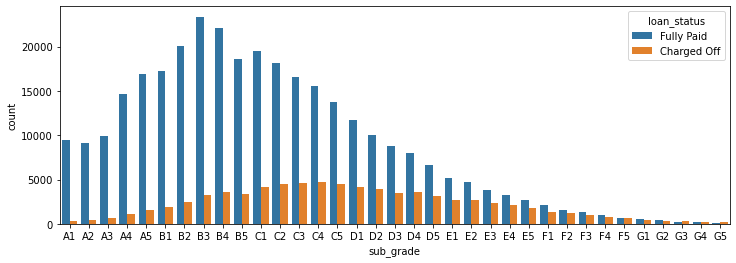

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df, order=order,hue='loan_status');

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [32]:
# df.groupby('grade').sub_grade.value_counts().sort_index(level=1)/df.groupby('grade').sub_grade.count()

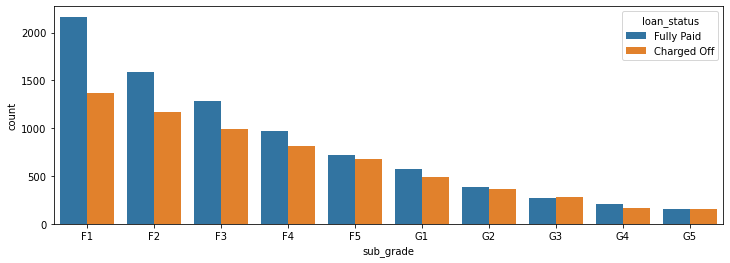

In [33]:
plt.figure(figsize=(12,4))
df2=df[(df.grade=='F') | (df.grade=='G')]

# Alternative
# df2=df[df.grade.isin({'F','G'})]
# df2=df[df.sub_grade.str.extract('(\w)')[0].isin({'F','G'})]
sns.countplot(x='sub_grade',data=df2, order=sorted(df2.sub_grade.unique()), hue='loan_status');

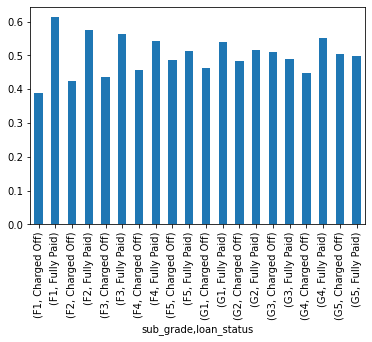

In [34]:
(df2.groupby(['sub_grade','loan_status'])['term'].count()/df2.groupby(['sub_grade'])['term'].count()).plot.bar();

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [35]:
df.loan_status.value_counts(dropna=True)

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [36]:
df['loan_repaid']=df.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)
# df["loan_repaid"] = df["loan_status"].replace(["Charged Off", "Fully Paid"], [0,1])
# df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
# df['loan_repaid'] = [1 if x == 'Fully Paid' else 0 for x in df['loan_status']]
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

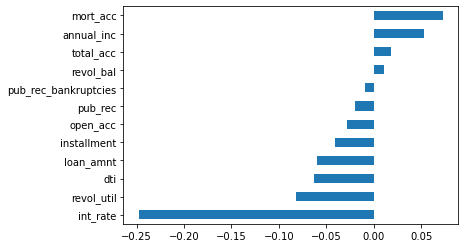

In [37]:
# plt.figure(figsize=(12,8))
df.corr()["loan_repaid"][:-1].sort_values().plot.barh();

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [38]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [39]:
df.shape[0]

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [40]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [41]:
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

null_values(df)

,Missing_Records,Percentage (%)
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [42]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [43]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [44]:
df.emp_title.nunique()

173105

In [45]:
df.emp_title.value_counts(dropna=False)

NaN                          22927
Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
                             ...  
A global investment bank         1
enterprise crude oil             1
Temp  Clerk                      1
GS-14                            1
K-5 Instructional Coach          1
Name: emp_title, Length: 173106, dtype: int64

In [46]:
df[df.emp_title.isnull()]['annual_inc'].describe()

count    2.292700e+04
mean     5.838728e+04
std      5.103432e+04
min      0.000000e+00
25%      3.100000e+04
50%      4.800000e+04
75%      7.000000e+04
max      2.500000e+06
Name: annual_inc, dtype: float64

In [47]:
df[df.emp_title.notnull()]['annual_inc'].describe()

count    3.731030e+05
mean     7.517505e+04
std      6.209912e+04
min      4.000000e+03
25%      4.600000e+04
50%      6.500000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

* the customer having a title has high annual income. We take into acount this situation.

In [48]:
df.loc[df.emp_title.notnull(),'emp_title']=1
df.loc[df.emp_title.isnull(),'emp_title']=0

df.emp_title.value_counts(dropna=False)

1    373103
0     22927
Name: emp_title, dtype: int64

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [49]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [50]:
sorted(df.emp_length.dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [51]:
ordered_list = [ '< 1 year',
                '1 year',
                '2 years',
                '3 years',
                '4 years',
                '5 years',
                '6 years',
                '7 years',
                '8 years',
                '9 years',
                '10+ years']

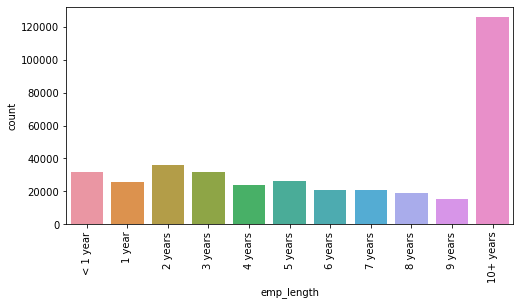

In [52]:
plt.figure(figsize=(8,4))
sns.countplot(x='emp_length',data=df,order=ordered_list)
plt.xticks(rotation=90);

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

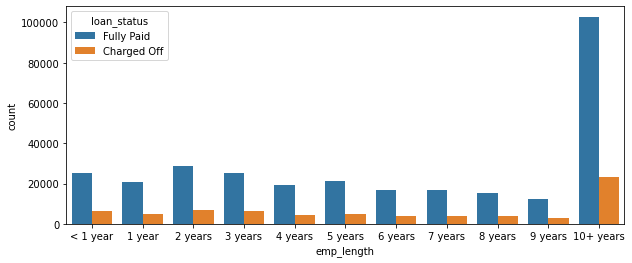

In [53]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length', data=df, hue='loan_status',order=ordered_list);

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [54]:
not_paid=df[df.loan_status=='Charged Off'].groupby('emp_length').loan_status.count()
paid=df[df.loan_status=='Fully Paid'].groupby('emp_length').loan_status.count()

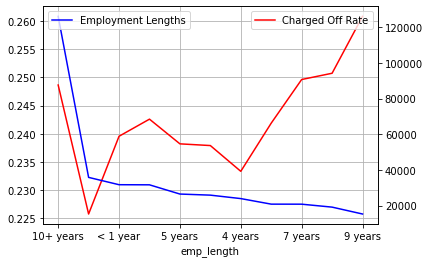

In [55]:
fig, ax = plt.subplots()
(not_paid/paid).plot(ax=ax,color='r',label='Charged Off Rate')
plt.legend(loc="upper right")

ax2 = ax.twinx()
df.emp_length.value_counts().plot(ax=ax2,color='b',label='Employment Lengths')
plt.legend(loc="upper left")
ax.grid()

> Eksen olcekleri farkli oldugu icin yukaridaki grafik dogru bir insight vermez. Standart sapma ve ortalamaya bakarak karar vermelidir.

In [56]:
print('Standart deviation:', (not_paid/paid).std(), 
      '\nAverage:',(not_paid/paid).mean(), 
      '\n\n',not_paid/paid)

Standart deviation: 0.009509952092235605 
Average: 0.2426467741107949 

 emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='emp_length'>

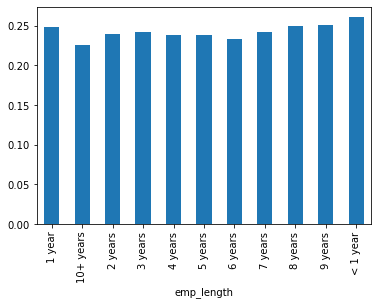

In [57]:
(not_paid/paid).plot.bar()
# plt.ylim(0.22,0.265);

> The ratio of paid and not paid loans by employment length are almost same. Since there is no evidence that employment length affect whether the loan is paid, Lets drop this column.

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [58]:
df.drop('emp_length',axis=1,inplace =True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [59]:
null_values(df)

,Missing_Records,Percentage (%)
mort_acc,37795,9.543469
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


**title** and **purpose**

In [60]:
df[['purpose','title']].head(10)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
5,debt_consolidation,Debt consolidation
6,home_improvement,Home improvement
7,credit_card,No More Credit Cards
8,debt_consolidation,Debt consolidation
9,debt_consolidation,Debt Consolidation


These two columns consist almost same information. The purpose columns has no null values and is well categorized. So, I will drop title column.

In [61]:
df = df.drop('title',axis=1)

**home_ownership**

In [62]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

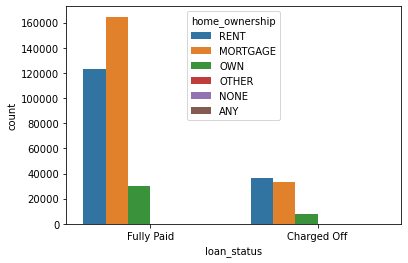

In [63]:
sns.countplot(x='loan_status',data=df,hue='home_ownership');

In [64]:
df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER',inplace=True)

**mort_acc**

In [65]:
feat_info('mort_acc')

Number of mortgage accounts.


In [66]:
df['mort_acc'].value_counts(dropna=False)

0.0     139777
1.0      60416
2.0      49948
3.0      38049
NaN      37795
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

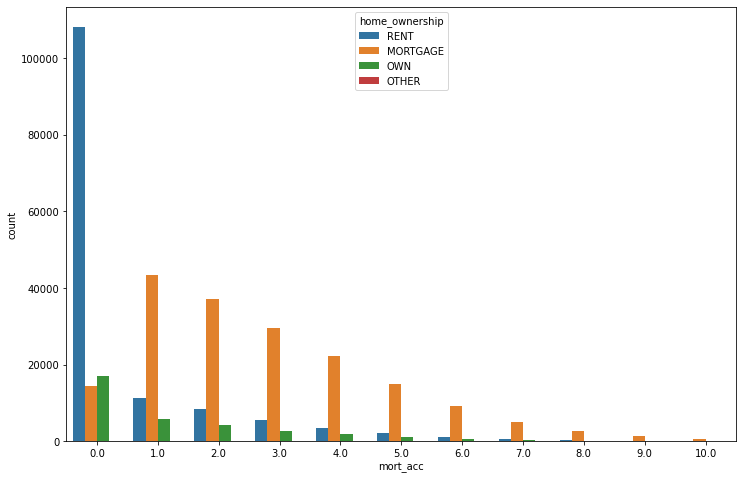

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(x='mort_acc',data=df[df['mort_acc']<=10], hue='home_ownership')

> mort_acc=0 olanlar kirada oturuyor. Bu insight a gore mort_acc da filling yapalim.

In [68]:
index=df[(df.mort_acc.isnull()) & (df.home_ownership=='RENT')].loc[:,'mort_acc'].index
df.mort_acc.loc[index]=0

In [69]:
null_values(df)

,Missing_Records,Percentage (%)
mort_acc,19689,4.971593
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


> home_ownership e gore filling yaparak, mort_acc de nan sayisini %50 azalttik.

In [70]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, dummies], axis=1)

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [71]:
df.corr()['mort_acc'].sort_values()

RENT                   -0.472781
int_rate               -0.066562
OWN                    -0.050904
dti                    -0.016230
OTHER                   0.000851
revol_util              0.009378
pub_rec                 0.021847
pub_rec_bankruptcies    0.036753
loan_repaid             0.066018
open_acc                0.127442
revol_bal               0.200895
installment             0.206743
loan_amnt               0.232955
annual_inc              0.240135
total_acc               0.388886
mort_acc                1.000000
Name: mort_acc, dtype: float64

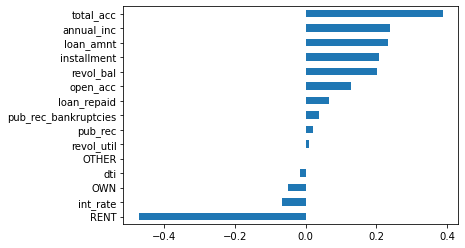

In [72]:
df.corr()['mort_acc'].sort_values()[:-1].plot.barh();

In [73]:
def fill_mean(df, group_col, col_name): # Filling missing values with mean values according to group_col
    df[col_name].fillna(df.groupby(group_col)[col_name].transform("mean"), inplace=True)
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

fill_mean(df,'total_acc','mort_acc')

Number of NaN :  0
------------------
0.000000     157883
1.000000      60416
2.000000      49948
3.000000      38049
4.000000      27887
              ...  
34.000000         1
3.212389          1
3.176471          1
2.800000          1
3.111111          1
Name: mort_acc, Length: 108, dtype: int64


In [74]:
df['mort_acc']=df['mort_acc'].apply(round)
df['mort_acc'].value_counts(dropna=False)

0     159754
1      66614
2      57261
3      42332
4      27911
5      18194
6      11069
7       6052
8       3121
9       1656
10       865
11       479
12       264
13       146
14       107
15        61
16        37
17        22
18        18
19        15
20        13
24        10
22         7
21         4
25         4
27         3
32         2
23         2
26         2
31         2
28         1
30         1
34         1
Name: mort_acc, dtype: int64

> 10 ve uzeri mort_acc olalarin hepsini 10 yapalim.

In [75]:
index=df[df['mort_acc']>=10]['mort_acc'].index
df.mort_acc.loc[index]=10
df['mort_acc'].value_counts(dropna=False)

0     159754
1      66614
2      57261
3      42332
4      27911
5      18194
6      11069
7       6052
8       3121
10      2066
9       1656
Name: mort_acc, dtype: int64

In [76]:
null_values(df)

,Missing_Records,Percentage (%)
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


**pub_rec_bankruptcies**

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086751
annual_inc             -0.050162
open_acc               -0.027732
dti                    -0.014558
loan_repaid            -0.009383
OTHER                  -0.006146
OWN                     0.001230
RENT                    0.008194
mort_acc                0.035204
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

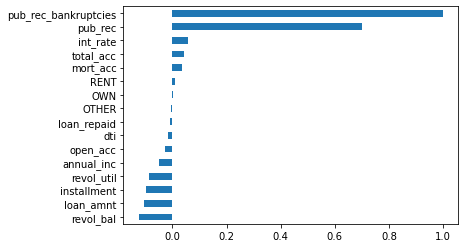

In [77]:
df.corr()['pub_rec_bankruptcies'].sort_values().plot.barh()
df.corr()['pub_rec_bankruptcies'].sort_values()

In [78]:
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [79]:
df.pub_rec.value_counts(dropna=False)

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

In [80]:
fill_mean(df,'pub_rec','pub_rec_bankruptcies')

Number of NaN :  0
------------------
0.000000    350897
1.000000     42790
2.000000      1847
3.000000       351
4.000000        82
5.000000        32
0.810205        17
6.000000         7
7.000000         4
8.000000         2
0.929863         1
Name: pub_rec_bankruptcies, dtype: int64


In [81]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(round)
df['pub_rec_bankruptcies'].value_counts(dropna=False)

0    350897
1     42808
2      1847
3       351
4        82
5        32
6         7
7         4
8         2
Name: pub_rec_bankruptcies, dtype: int64

In [82]:
null_values(df)

,Missing_Records,Percentage (%)
revol_util,276,0.069692


**revol_util**

In [83]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086381
loan_repaid            -0.082373
pub_rec                -0.075910
OWN                    -0.047366
OTHER                  -0.000138
mort_acc                0.008116
RENT                    0.012200
annual_inc              0.027871
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

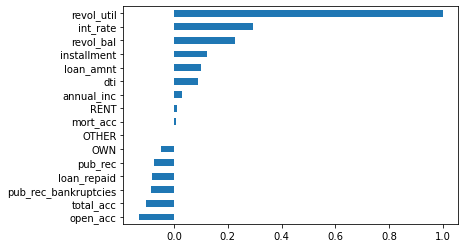

In [84]:
df.corr()['revol_util'].sort_values().plot.barh()
df.corr()['revol_util'].sort_values()

In [85]:
df.revol_util.fillna(method = 'ffill',inplace=True) 

In [86]:
null_values(df)

,Missing_Records,Percentage (%)


## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [87]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [88]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [89]:
df['term'] = df['term'].str.extract('(\d\d)')[0]

In [90]:
# # Alternative
# df['term'] = df['term'].apply(lambda term: int(term[:3]))
# df["term"] = df["term"].apply(lambda x: int(x.strip()[:2]))

In [91]:
df['term']=df.term.astype(int)
df['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [92]:
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [93]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'OTHER', 'OWN', 'RENT', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [94]:
df.select_dtypes(['object']).columns

Index(['emp_title', 'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [95]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [96]:
df.address.head(50)

0          0174 Michelle Gateway\nMendozaberg, OK 22690
1       1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2       87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                 823 Reid Ford\nDelacruzside, MA 00813
4                  679 Luna Roads\nGreggshire, VA 11650
5     1726 Cooper Passage Suite 129\nNorth Deniseber...
6     1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                             USCGC Nunez\nFPO AE 30723
8                              USCGC Tran\nFPO AP 22690
9                  3390 Luis Rue\nMauricestad, VA 00813
10            40245 Cody Drives\nBartlettfort, NM 00813
11     3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12       4173 David Extension\nWest Beckyfort, MS 70466
13             3343 Wells Mews\nShellychester, OR 29597
14    0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15     11629 Sean Hills Suite 614\nStevenfort, HI 30723
16    407 Briggs Lodge Suite 778\nWest Aprilborough,...
17    487 Jennifer Parkway Suite 940\nCummingssh

In [97]:
df['zipcode'] = df.address.str.extract('(\d{5}$)')[0]
# df['zipcode'] = df.address.str[-5:]
df['zipcode'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zipcode, dtype: int64

In [98]:
pd.crosstab(df['zipcode'],df['loan_status'])

loan_status,Charged Off,Fully Paid
zipcode,,
00813,0,45824
05113,0,45402
11650,11226,0
22690,10954,45573
29597,0,45471
30723,11021,45525
48052,11192,44725
70466,11148,45837
86630,10981,0


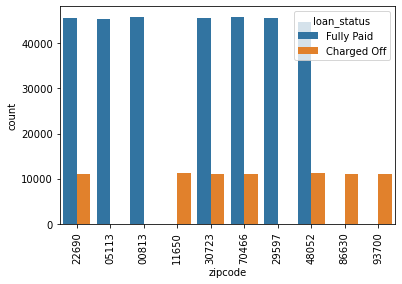

In [99]:
sns.countplot(x='zipcode',data=df,hue='loan_status')
plt.xticks(rotation=90);

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

### earliest_cr_line

In [100]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [101]:
df['earliest_cr_line'] = df['earliest_cr_line'].str.extract('(\d{4})')[0]
# df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x.strip()[-4:]))
df['delta_earliest_cr_line']=2018-df['earliest_cr_line'].astype('float')
df['delta_earliest_cr_line'].value_counts()

18.0    29366
17.0    29083
19.0    26491
16.0    25901
15.0    23657
        ...  
68.0        3
67.0        3
65.0        2
74.0        1
70.0        1
Name: delta_earliest_cr_line, Length: 65, dtype: int64

In [102]:
df = df.drop(['earliest_cr_line'],axis=1)

## Dropping

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 75 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int32  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   emp_title                            396030 non-null  object 
 5   annual_inc                           396030 non-null  float64
 6   issue_d                              396030 non-null  object 
 7   loan_status                          396030 non-null  object 
 8   dti                                  396030 non-null  float64
 9   open_acc                             396030 non-null  float64
 10  pub_rec                              396030 non-null  float64
 11  revol_bal    

In [104]:
df.drop('loan_status',axis=1, inplace=True)

In [105]:
df.drop('issue_d',axis=1, inplace=True)

In [106]:
df.drop('address',axis=1, inplace=True)

## Categorical Values

In [107]:
df.head()

,loan_amnt,term,int_rate,installment,emp_title,annual_inc,dti,open_acc,pub_rec,revol_bal,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zipcode,delta_earliest_cr_line
0,10000.0,36,11.44,329.48,1,117000.0,26.24,16.0,0.0,36369.0,...,0,0,0,0,0,0,1,0,22690,28.0
1,8000.0,36,11.99,265.68,1,65000.0,22.05,17.0,0.0,20131.0,...,0,0,0,0,0,0,0,0,05113,14.0
2,15600.0,36,10.49,506.97,1,43057.0,12.79,13.0,0.0,11987.0,...,0,0,0,0,0,0,0,0,05113,11.0
3,7200.0,36,6.49,220.65,1,54000.0,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,00813,12.0
4,24375.0,60,17.27,609.33,1,55000.0,33.95,13.0,0.0,24584.0,...,0,0,0,0,0,0,0,0,11650,19.0


In [108]:
df.emp_title=df.emp_title.astype('uint8')
df.zipcode=df.zipcode.astype('int')


In [109]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int32  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   emp_title                            396030 non-null  uint8  
 5   annual_inc                           396030 non-null  float64
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  revol_util                           396030 non-null  float64
 11  total_acc    

In [111]:
null_values(df)

,Missing_Records,Percentage (%)


## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [112]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [113]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
df.shape

NameError: name 'df' is not defined

In [ ]:
model = Sequential()

model.add(Dense(72, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(36, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))

# binary classification
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer = opt)

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [182]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

**TASK: OPTIONAL: Save your model.**

In [183]:
model.fit(x=X_train, y=y_train, 
          epochs=300,
          batch_size=256,
          validation_data=(X_test,y_test),verbose=1,
          callbacks=[early_stop])

Epoch 1/300
1238/1238 [==============================] - 4s 3ms/step - loss: 0.5324 - val_loss: 0.4219
Epoch 2/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.4352 - val_loss: 0.4101
Epoch 3/300
1238/1238 [==============================] - 3s 3ms/step - loss: 0.4214 - val_loss: 0.4016
Epoch 4/300
1238/1238 [==============================] - 3s 3ms/step - loss: 0.4124 - val_loss: 0.3928
Epoch 5/300
1238/1238 [==============================] - 3s 3ms/step - loss: 0.4034 - val_loss: 0.3835
Epoch 6/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.3959 - val_loss: 0.3761
Epoch 7/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.3888 - val_loss: 0.3698
Epoch 8/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.3843 - val_loss: 0.3659
Epoch 9/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.3767 - val_loss: 0.3641
Epoch 10/300
1238/1238 [==============================] - 3s 2ms/step - l

Epoch 80/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2755 - val_loss: 0.2748
Epoch 81/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2780 - val_loss: 0.2746
Epoch 82/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2763 - val_loss: 0.2744
Epoch 83/300
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2756 - val_loss: 0.2746
Epoch 84/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2749 - val_loss: 0.2748
Epoch 85/300
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2767 - val_loss: 0.2746
Epoch 86/300
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2749 - val_loss: 0.2749
Epoch 87/300
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2750 - val_loss: 0.2744
Epoch 88/300
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2737 - val_loss: 0.2748
Epoch 89/300
1238/1238 [==============================] - 3s 2ms

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

<AxesSubplot:>

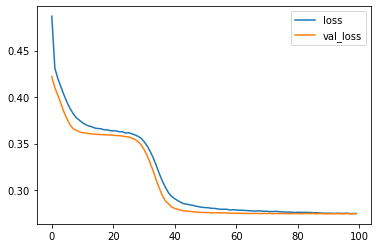

In [184]:
losses=pd.DataFrame(model.history.history)

losses.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [185]:
y_pred = model.predict_classes(X_test)

In [186]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[6831 8662]
[  121 63592]
              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



### saving model

In [187]:
model.save('model.h5')

In [188]:
df.shape

(396030, 72)

In [189]:
import random

In [190]:
new_customer= df.drop('loan_repaid',axis=1).iloc[269910]
new_customer = scaler.transform(new_customer.values.reshape(-1, 71)) # -1; tüm satırı al, sutunu ben belirleyeceğim

In [191]:
print('Prediction: ', *model.predict_classes(new_customer)[0], 
      '\nActual: ',df['loan_repaid'].iloc[269910], sep='')

Prediction: 1
Actual: 0


**tensorboard**

In [192]:
import os
import datetime
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [193]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [194]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[tensorboard_callback]
          )

Epoch 1/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2743 - val_loss: 0.2746
Epoch 2/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2748 - val_loss: 0.2745
Epoch 3/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2742 - val_loss: 0.2744
Epoch 4/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2743 - val_loss: 0.2742
Epoch 5/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2740 - val_loss: 0.2745
Epoch 6/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2746 - val_loss: 0.2743
Epoch 7/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2740 - val_loss: 0.2744
Epoch 8/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2738 - val_loss: 0.2741
Epoch 9/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2740 - val_loss: 0.2743
Epoch 10/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.274

In [196]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 15512), started 0:00:49 ago. (Use '!kill 15512' to kill it.)